In [1]:
from json import load

with open('DMN_params.json', 'r') as fh:
    params = load(fh)

# keys = sorted(params.keys())
keys = [
    'lstm_cp63_len63',
    'tft_cp12621_len252',
    'tft_cp63_len63'
]


In [2]:
from collections import defaultdict

def group(data):
    rv = defaultdict(lambda:defaultdict(list))
    for e in data:
        s = e['score']
        for k, v in e['param'].items():
            rv[k][v].append(s)
    return rv

# print(group(params['lstm_cp63_len63']))

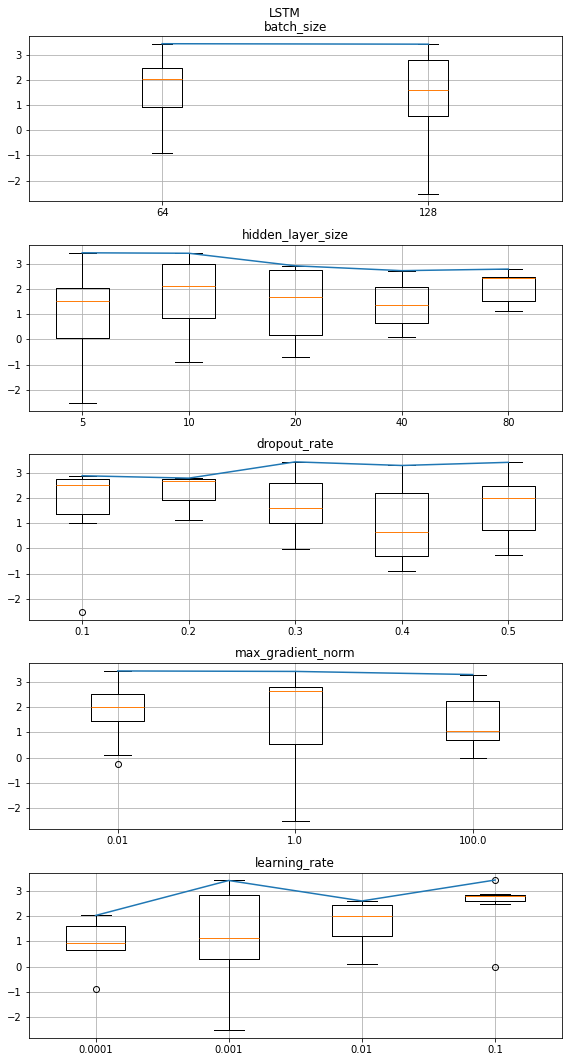

In [3]:
from matplotlib import pyplot as plt

def plot_bars(grouped):
    for k in sorted(grouped.keys()):
        pass
    fig, axs = plt.subplots(len(grouped), figsize=(8, 15))
    for i, (k, v) in enumerate(grouped.items()):
        ax = axs[i]
        ax.set_title(k)
        ms = sorted(v.keys())
        vs = [v[m] for m in ms]
        ax.boxplot(vs)
        ax.plot(range(1, len(ms)+1), [max(v) for v in vs])
        ax.set_xticklabels(ms)
        ax.grid(True)
    return fig
    
fig = plot_bars(group(params['lstm_cp63_len63']))
fig.suptitle('LSTM')
plt.tight_layout()
plt.show()

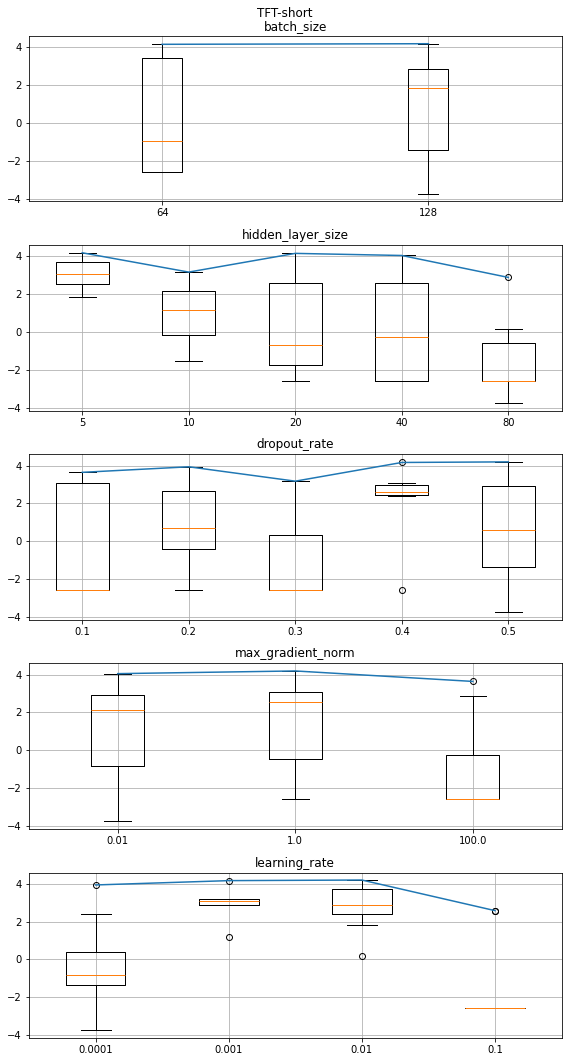

In [4]:
fig = plot_bars(group(params['tft_cp63_len63']))
fig.suptitle('TFT-short')
plt.tight_layout()
plt.show()

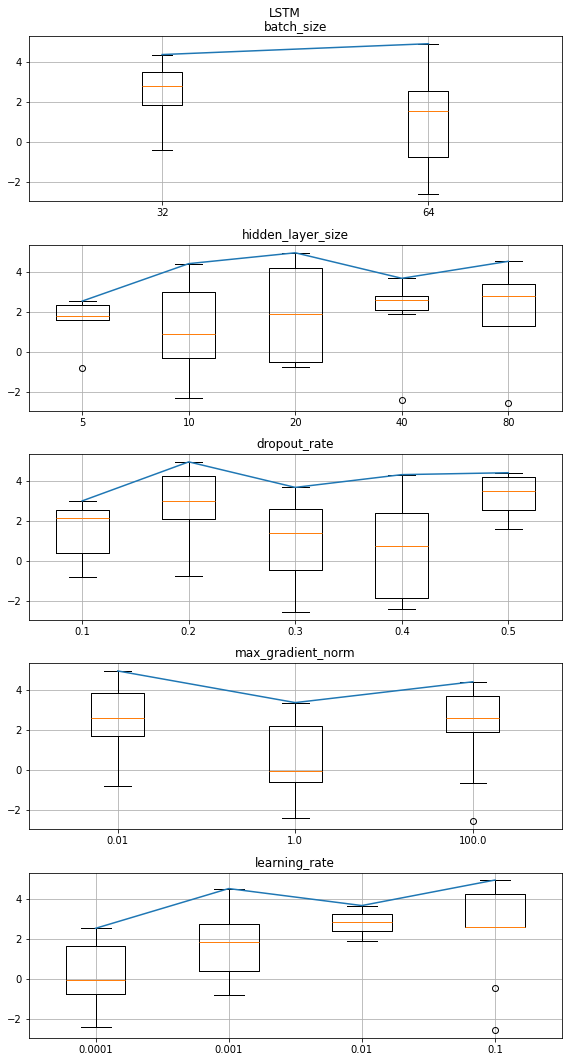

In [5]:
fig = plot_bars(group(params['tft_cp12621_len252']))
fig.suptitle('LSTM')
plt.tight_layout()
plt.show()